In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs
import pint_xarray
import cf_xarray as cfxr
from eofs.xarray import Eof

In [2]:
from dask.distributed import Client, LocalCluster
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33303,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:44867,Total threads: 2
Dashboard: /proxy/35977/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:43243,


In [21]:
#check daily SST files and are they differnet in diffetent runs?

In [22]:
#No perturb

In [3]:
#load daily sst from scratch?
CP_daily = xr.open_mfdataset("/scratch/e14/sm2435/archive/dd756/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":365})

In [23]:
#perturb 1 year resub

In [4]:
CP_daily2 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de695/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":30})

In [24]:
#perturb 1 month resub

In [5]:
CP_daily3 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de759/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":30})

In [6]:
CP_sst = CP_daily.sst

In [7]:
CP_sst2 = CP_daily2.sst

In [8]:
CP_sst3 = CP_daily3.sst

In [25]:
#difference perturb (1 year resubmit) and unperturb

In [16]:
diff1 = CP_sst2 - CP_sst

In [26]:
#difference perturb (1 month resubmit) and unperturb

In [27]:
diff2 = CP_sst3 - CP_sst

**plot the Jan 31 and Feb 1 for perturbed case (resubmitted every month)**

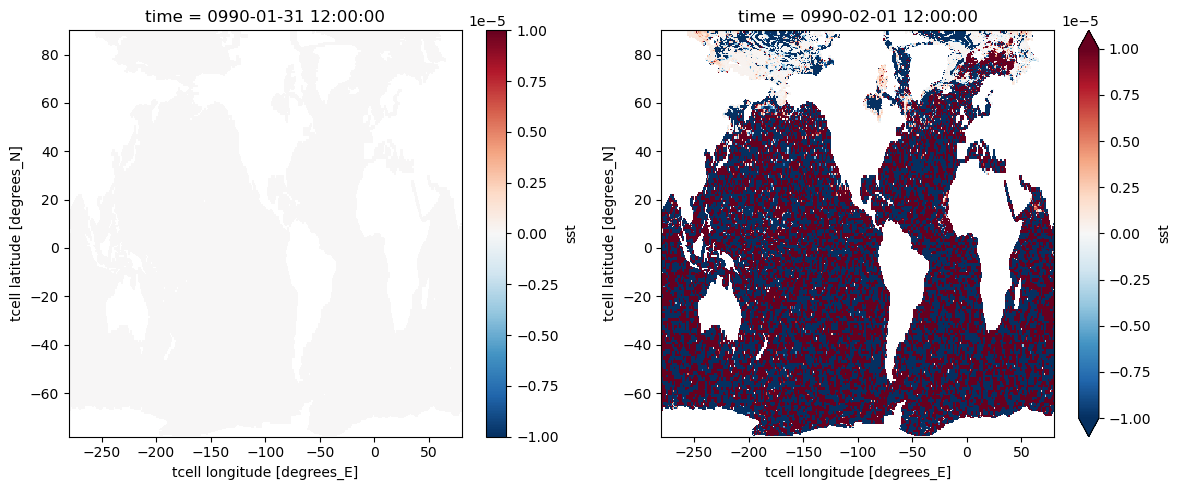

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
diff2[30].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

# Plot second subplot
diff2[31].plot(ax=axs[1], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

plt.tight_layout()
plt.show()

**plot the Jan 31 and Feb 1 for perturbed case (resubmitted every YEAR)**

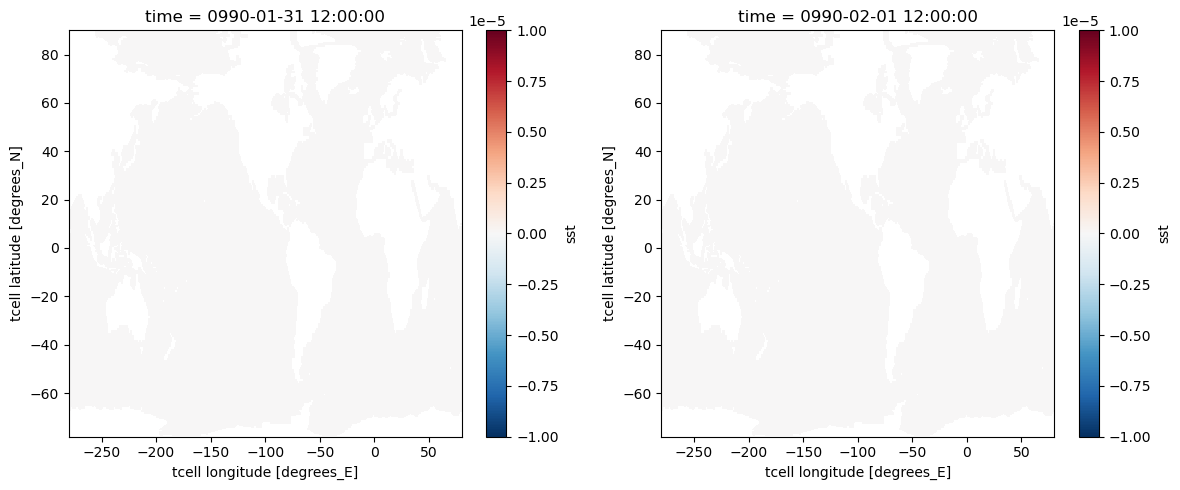

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
diff1[30].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

# Plot second subplot
diff1[31].plot(ax=axs[1], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

plt.tight_layout()
plt.show()

**No difference when job resubmission is yearly???????** - these vlaues have been checked at array level and are identical

Now to check atmopshere files

In [34]:
CP_A1 = xr.open_mfdataset("/scratch/e14/sm2435/archive/dd756/history/atm/netCDF/dd756a.pm0990*", use_cftime=True)

In [37]:
CP_A2 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de695/history/atm/netCDF/de695a.pm0990*", use_cftime=True)

In [38]:
CP_A3 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de759/history/atm/netCDF/de759a.pm*", use_cftime=True)

In [ ]:
#load in temp stash code = fld_s00i004

In [42]:
A1_T = CP_A1.fld_s00i004

In [43]:
A2_T = CP_A2.fld_s00i004

In [44]:
A3_T = CP_A3.fld_s00i004

In [46]:
#lets plot the month temp diff

In [47]:
A_diff1 = A2_T - A1_T

In [48]:
A_diff2 = A3_T - A1_T

**plot the Jan  and Feb for perturbed case (resubmitted every YEAR)**

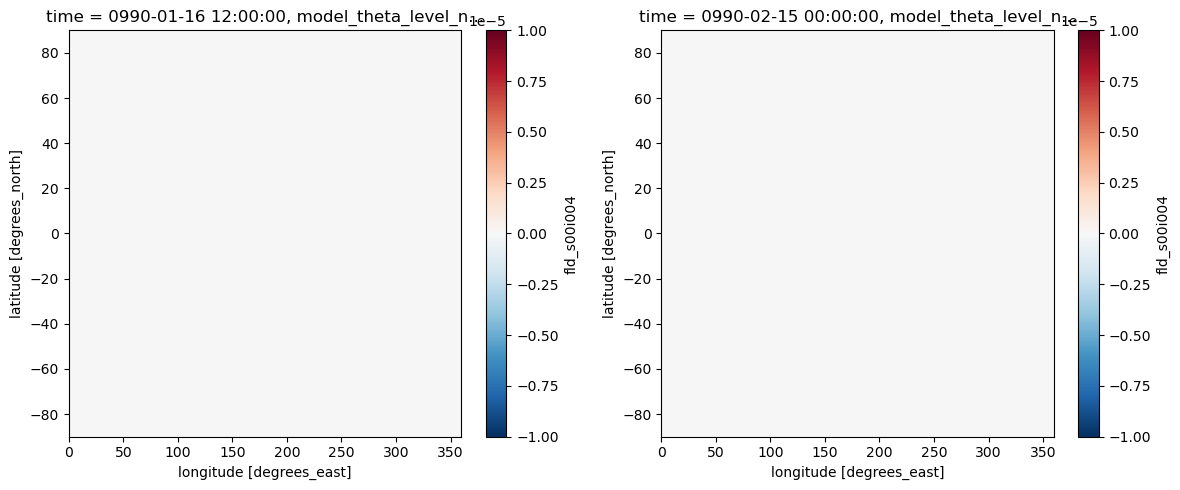

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diff1[0,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

# Plot second subplot
A_diff1[1,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

plt.tight_layout()
plt.show()

**plot the Jan 31 and Feb 1 for perturbed case (resubmitted every MONTH)**

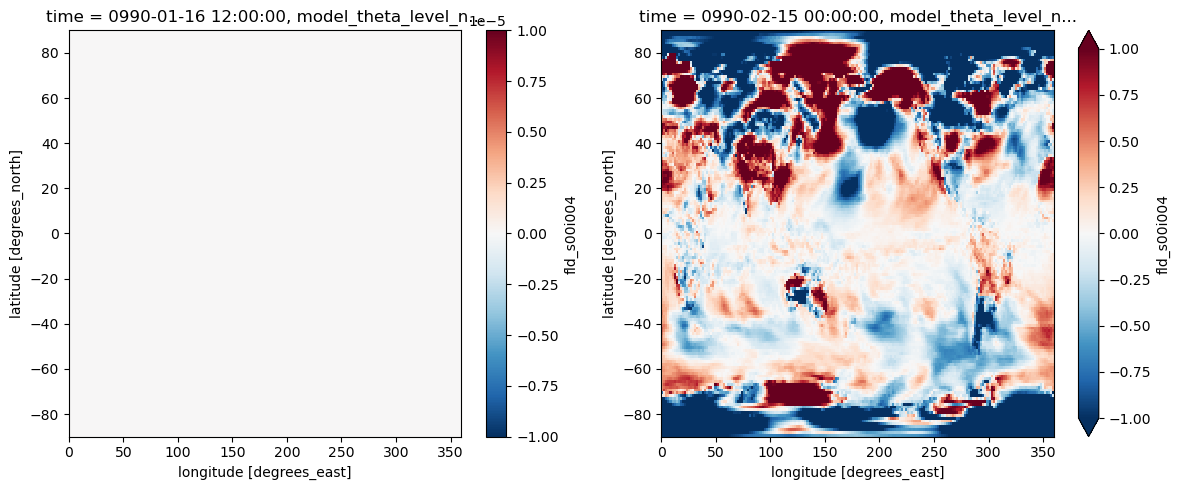

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diff2[0,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

# Plot second subplot
A_diff2[1,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -1, vmax = 1)

plt.tight_layout()
plt.show()

Why is this only chnaging when the coupled job is monthly?????